In [2]:
import pandas as pd
df=pd.read_csv('train_promotion_eligibility.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,69764,Operations,region_2,Bachelor's,f,sourcing,1,54,3.0,19,0,0,62,0
1,16669,Procurement,region_16,Master's & above,f,sourcing,1,39,5.0,10,1,0,70,0
2,78119,Procurement,region_11,Bachelor's,f,other,1,36,3.0,4,1,0,72,0
3,46952,Sales & Marketing,region_13,Master's & above,m,other,1,40,3.0,2,0,0,51,0
4,26755,Technology,region_27,Master's & above,m,other,2,41,3.0,5,0,0,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,63645,Operations,region_32,Bachelor's,m,other,1,33,2.0,4,0,0,62,0
43842,72360,Operations,region_2,Master's & above,m,sourcing,1,31,5.0,3,1,0,64,0
43843,30787,Technology,region_22,Bachelor's,f,other,1,26,5.0,3,1,0,80,1
43844,37353,Procurement,region_17,Bachelor's,f,sourcing,1,43,3.0,4,1,0,66,0


Warnings are now suppressed.


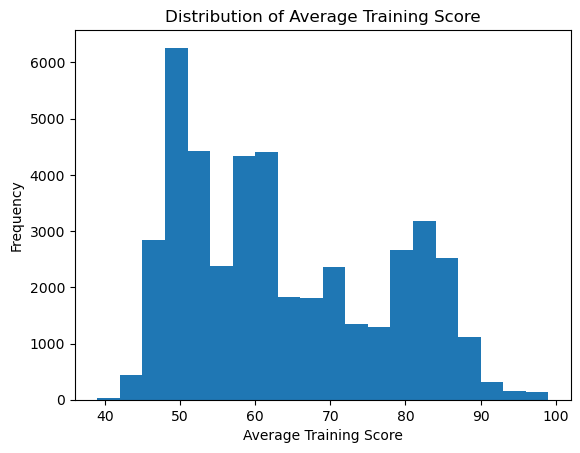

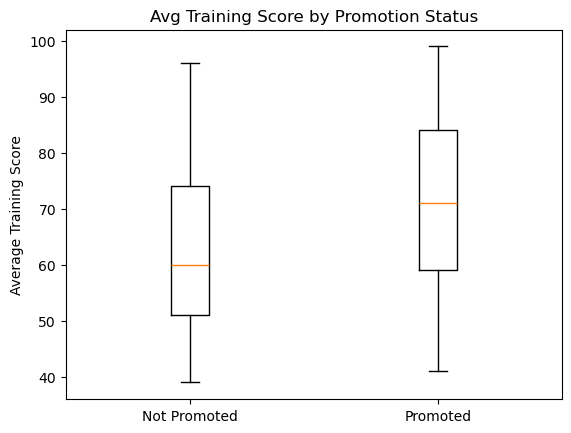

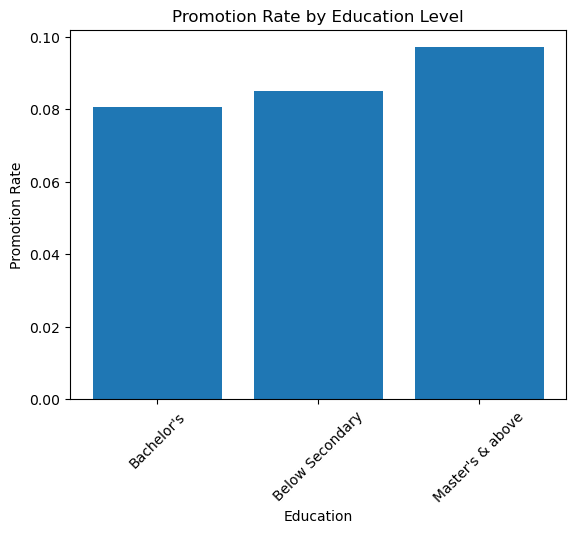

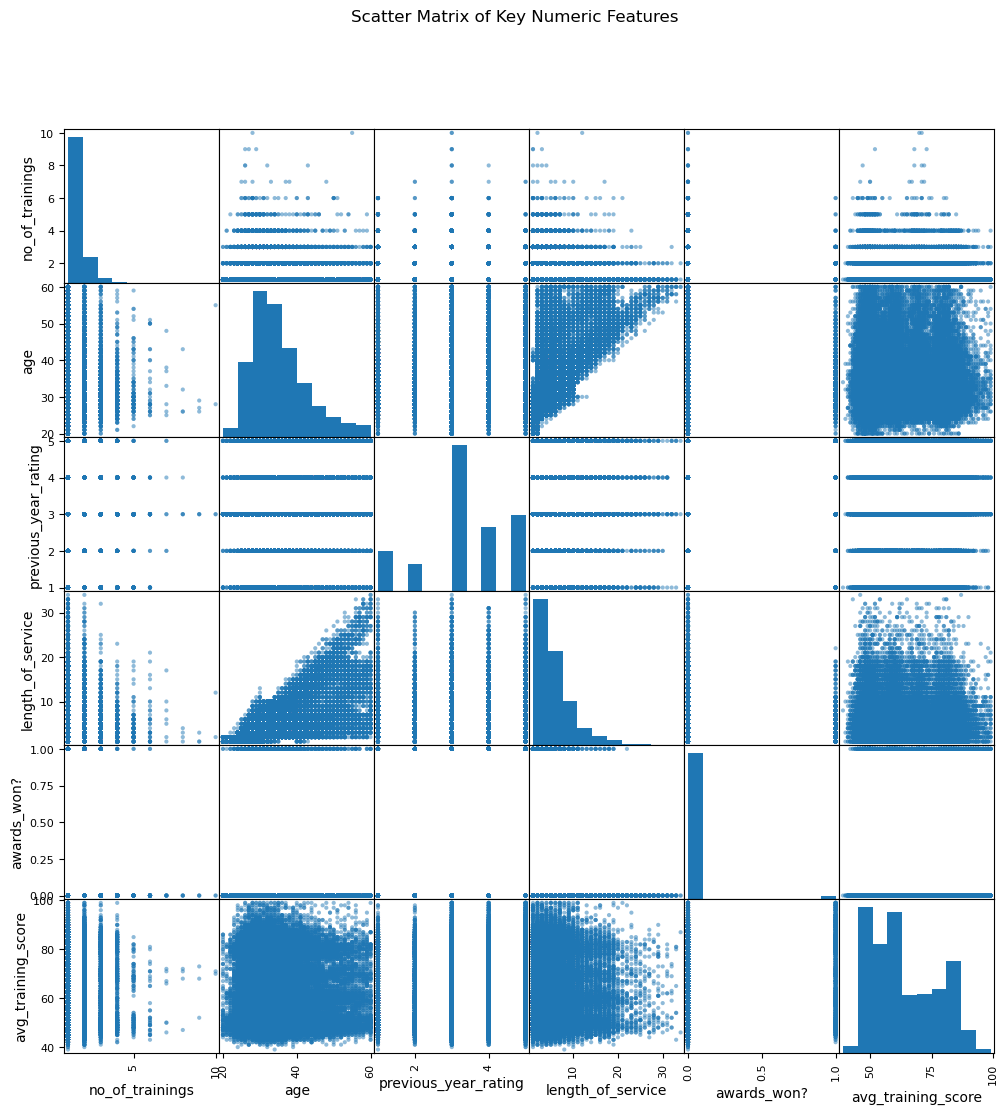

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Example: If you only want to ignore specific categories, uncomment and adjust:
# warnings.filterwarnings('ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore', category=FutureWarning)

# If using libraries with verbose logging, you can also adjust logging levels:
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger('xgboost').setLevel(logging.ERROR)

# Load the data (assumes the CSV is in the working directory)
df = pd.read_csv('train_promotion_eligibility.csv')

# Fill missing values similarly to preprocessing
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

# Map KPIs_met >80% to binary integers if not already
df['KPIs_met >80%'] = df['KPIs_met >80%'].astype(int)

# 1. Histogram of avg_training_score
plt.figure()
plt.hist(df['avg_training_score'].dropna(), bins=20)
plt.title('Distribution of Average Training Score')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of avg_training_score by promotion status
plt.figure()
data_to_plot = [df[df['is_promoted'] == 0]['avg_training_score'].dropna(),
                df[df['is_promoted'] == 1]['avg_training_score'].dropna()]
plt.boxplot(data_to_plot, labels=['Not Promoted', 'Promoted'])
plt.title('Avg Training Score by Promotion Status')
plt.ylabel('Average Training Score')
plt.show()

# 3. Bar chart: Promotion rate by education level
promo_rates = df.groupby('education')['is_promoted'].mean()
plt.figure()
plt.bar(promo_rates.index, promo_rates.values)
plt.title('Promotion Rate by Education Level')
plt.xlabel('Education')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45)
plt.show()

# 4. Scatter matrix of key numeric features colored by promotion
features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']
scatter_matrix(df[features], alpha=0.5, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix of Key Numeric Features')
plt.show()
